In [1]:
import pandas as pd

df = pd.read_csv("anysplat_eval_all_metrics.csv")
df.head()


,claim_id,image_index,psnr,ssim,lpips
0,6.0,0.0,22.971769,0.768295,0.128867
1,6.0,1.0,20.699810,0.789873,0.286293
2,6.0,2.0,24.886683,0.853162,0.091436
3,6.0,3.0,17.733355,0.693383,0.233271
4,6.0,4.0,17.002306,0.574628,0.288986


In [16]:
image_counts = df['claim_id'].value_counts().sort_index()
image_counts.head()


claim_id
6.0     12
11.0     7
12.0     8
16.0    34
17.0    13
Name: count, dtype: int64

In [17]:
claim_means = df.groupby("claim_id")[["psnr", "ssim", "lpips"]].mean().reset_index()
claim_means["num_images"] = claim_means["claim_id"].map(image_counts)
claim_means.head()

,claim_id,psnr,ssim,lpips,num_images
0,6.0,20.715692,0.729174,0.202432,12
1,11.0,21.924629,0.790004,0.156401,7
2,12.0,20.876698,0.770892,0.228286,8
3,16.0,16.361773,0.520782,0.310091,34
4,17.0,18.667010,0.653710,0.309958,13


In [19]:
summary_stats = claim_means[["num_images", "psnr", "ssim", "lpips"]].describe().loc[["mean", "std", "min", "max"]]
summary_stats.round(3)


,num_images,psnr,ssim,lpips
mean,11.967,20.361,0.729,0.243
std,5.869,2.016,0.092,0.138
min,5.000,16.067,0.521,0.107
max,34.000,25.010,0.872,0.647


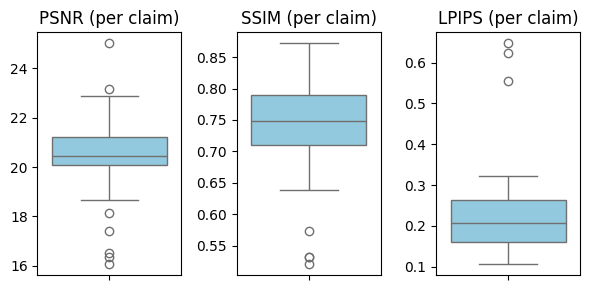

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

metrics = ['psnr', 'ssim', 'lpips']
titles = ['PSNR', 'SSIM', 'LPIPS']

for i, metric in enumerate(metrics):
    sns.boxplot(y=claim_means[metric], ax=axs[i], color='skyblue')
    axs[i].set_title(f"{titles[i]} (per claim)")
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

plt.tight_layout()
plt.show()


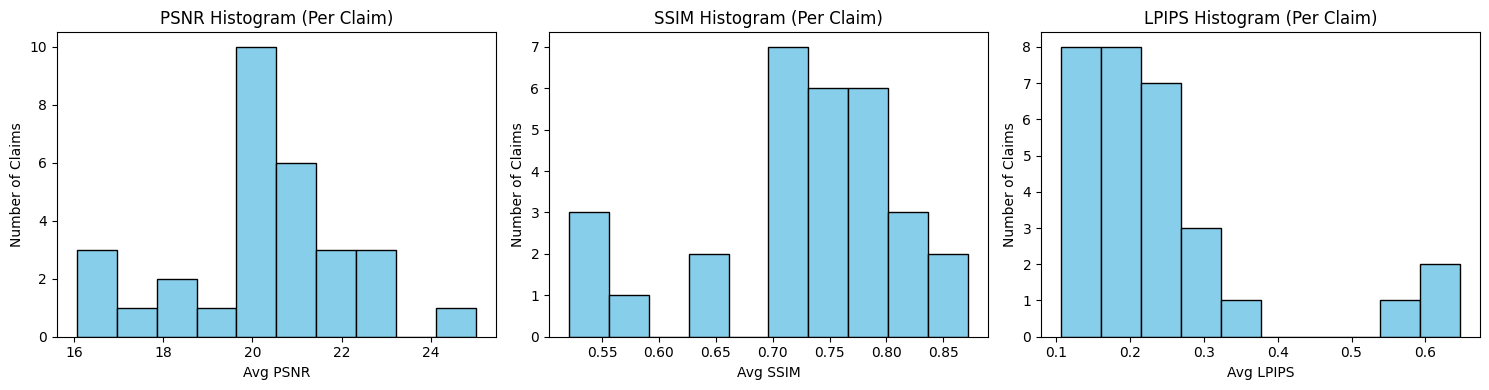

In [26]:
plt.figure(figsize=(15, 4))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    plt.hist(claim_means[metric], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"{metric.upper()} Histogram (Per Claim)")
    plt.xlabel(f"Avg {metric.upper()}")
    plt.ylabel("Number of Claims")

plt.tight_layout()
plt.show()
